<a href="https://colab.research.google.com/github/Denysse-Sevilla/MAT-421/blob/main/Module_H_22_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework #9- Denysse Sevilla**

## Section 22.1: ODE Initial Value Problem Statement

**Ordinary differential Equation (ODE)**: a differential equation where the independent variable, including its derivatives, is in one dimension:

$F(x,f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \frac{d^3f(x)}{dx^3}, ..., \frac{d^{n-1}f(x)}{dx^{n-1}} ) = \frac{d^nf(x)}{dx^n} $,

where $n$ is the order of the differential equation.

\
The **initial value** is a known value for the $0^{th}$ to $(n-1)^{th}$ derivatives at:

$x = 0, f(0), f^{(1)}(0), f^{(2)}(0), ..., f^{(n-1)}(0)$.

\
**Partial differential equation**: a general form differential equation where $x$ is a vector containing the independent variables $x_1, x_2,..., x_i$. Additionally, the partial derivatives can be of any order with respect to any combination of variables!

\
**Initial value problem**: finding a solution to an ODE given an initial value.

## Section 22.2: Reduction of Order

Often, we must reduce the order of higher order differential equations to the first order, allowing us to solve initial value problems.

To do so, we can rewrite the equation using a vector $S(t)$, which denotes the state of the system as a function of time. Then, we obtain the derivative of each element in the vector. What this does is turn an $n^{th}$ order ODE into $n$ first order ODEs that share the same terms.

## Section 22.3: The Euler Method

Let $\frac{dS(t)}{dt} = F(t,S(t))$ be an explicitly defined first order ODE. Additionally, assume that $t_0=0$ and $t_f=Nh$ for some positive integer N. Then, the linear approximation of $S(t)$ around $t_j$ at $t_{j+1}$ is

$S(t_{j+1}) = S(t_j) + hF(t_j,S(t_j))$.

This formula is known as the **Explicit Euler Formula**, which allows us to approximate the state at $S(t_{j+1})$ given the state at $S(t_j)$. This method is the simplest way to solve for initial value problems!

\
At any $(t_j,S(t_j))$, it uses $F$ at that state to direct the direction of the next state and then moves in that direction a distance of $h$.

\
Ex: The differential equation $\frac{df(t)}{dt} = e^{-t}$ with initial condition $f_0=-1$ has the exact solution $f(t) = -e^{-t}$. Approximate the solution to this initial value problem between 0 and 1 in increments of 0.05 using the Explicitly Euler Formula. Plot the difference between the appeoximated solution and the exact solution.

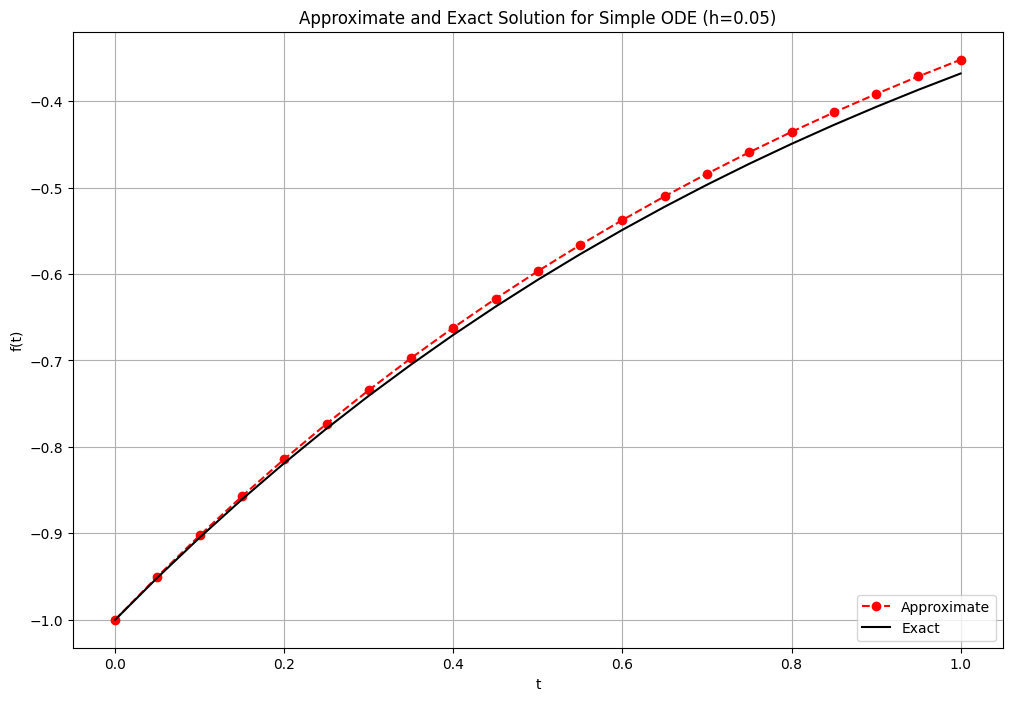

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.05 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'ro--', label='Approximate')
plt.plot(t, -np.exp(-t), 'k', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE (h=0.05)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Note that each dot is an approximation based on the previous. Additionally, a smaller step size leads to a better approximation for the solution:

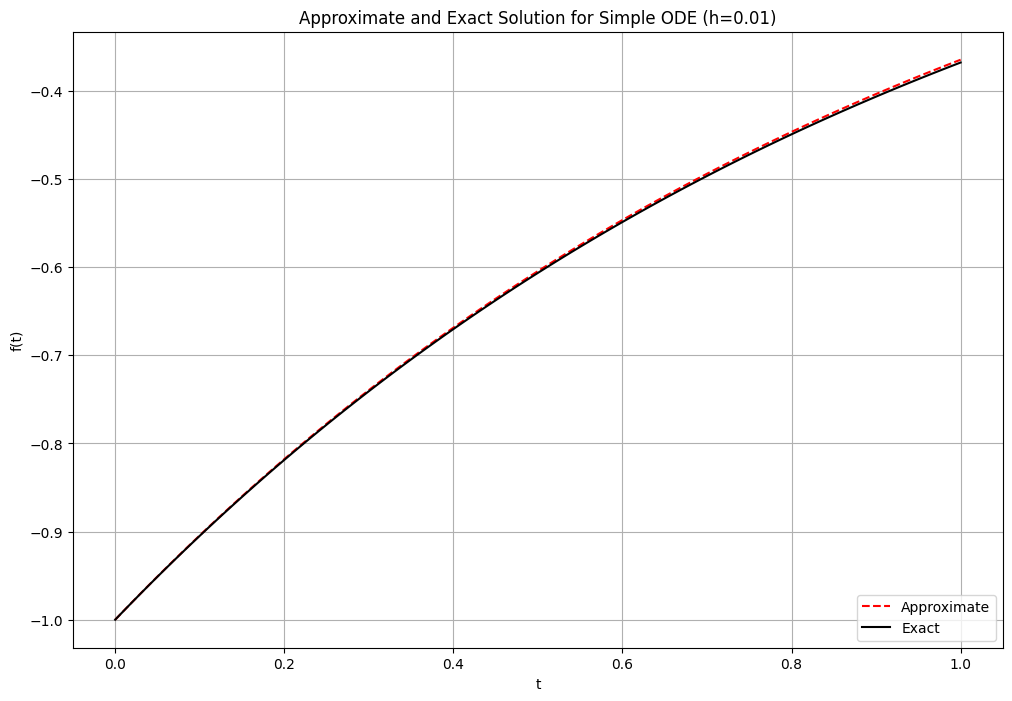

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.01 # Step size (changed from 0.05 to 0.01)
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'r--', label='Approximate')
plt.plot(t, -np.exp(-t), 'k', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE (h=0.01)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Finally, the **Implicit Euler Formula** can be derived by taking the linear approximation of $S(t)$ around $t_{j+1}$ and computing it at $t_j$:

$S(t_{j+1}) = S(t_j) + hF(t_{j+1}, S(t_{j+1}))$.